In [3]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_csv("crime_analysis.csv")
data

C:\Users\omkar\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,addr_pct_cd,crm_atpt_cptd_cd,juris_desc,ky_cd,law_cat_cd,loc_of_occur_desc,ofns_desc,rpt_dt,vic_age_group,vic_race,...,prem_typ_desc,susp_age_group,susp_race,susp_sex,datetime,year,month,weekday,dayparting,hour
0,115,COMPLETED,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,2021-01-02T00:00:00.000,UNKNOWN,UNKNOWN,...,DRUG STORE,UNKNOWN,UNKNOWN,UNKNOWN,1921-01-02 08:50:00,1921.0,January,Sunday,Day,8.0
1,70,COMPLETED,N.Y. POLICE DEPT,351,MISDEMEANOR,INSIDE,CRIMINAL MISCHIEF & RELATED OF,2021-01-07T00:00:00.000,UNKNOWN,UNKNOWN,...,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,U,1921-01-06 22:00:00,1921.0,January,Thursday,Night,22.0
2,44,COMPLETED,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,2021-03-01T00:00:00.000,25-44,BLACK,...,RESIDENCE - APT. HOUSE,UNKNOWN,BLACK,M,1921-02-28 23:47:00,1921.0,February,Monday,Night,23.0
3,115,ATTEMPTED,N.Y. POLICE DEPT,109,FELONY,UNKNOWN,GRAND LARCENY,2021-03-11T00:00:00.000,25-44,WHITE,...,RESIDENCE-HOUSE,UNKNOWN,UNKNOWN,UNKNOWN,1921-03-02 04:04:00,1921.0,March,Wednesday,Night,4.0
4,123,COMPLETED,N.Y. POLICE DEPT,233,MISDEMEANOR,INSIDE,SEX CRIMES,2021-04-07T00:00:00.000,65+,WHITE,...,PRIVATE/PAROCHIAL SCHOOL,UNKNOWN,UNKNOWN,UNKNOWN,1955-01-01 00:01:00,1955.0,January,Saturday,Night,0.0
5,32,COMPLETED,N.Y. POLICE DEPT,233,MISDEMEANOR,INSIDE,SEX CRIMES,2021-05-10T00:00:00.000,45-64,WHITE,...,PUBLIC SCHOOL,UNKNOWN,UNKNOWN,U,1966-05-10 09:00:00,1966.0,May,Tuesday,Day,9.0
6,19,COMPLETED,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,2021-03-18T00:00:00.000,65+,UNKNOWN,...,RESIDENCE - APT. HOUSE,65+,UNKNOWN,M,1967-01-01 00:00:00,1967.0,January,Sunday,Night,0.0
7,70,COMPLETED,N.Y. POLICE DEPT,126,FELONY,FRONT OF,MISCELLANEOUS PENAL LAW,2021-02-12T00:00:00.000,25-44,WHITE,...,STREET,45-64,WHITE,M,1971-02-11 19:00:00,1971.0,February,Thursday,Evening,19.0
8,47,COMPLETED,N.Y. POLICE DEPT,578,VIOLATION,INSIDE,HARRASSMENT 2,2021-03-10T00:00:00.000,18-24,BLACK,...,RESIDENCE-HOUSE,25-44,BLACK,M,1971-03-10 14:00:00,1971.0,March,Wednesday,Afternoon,14.0
9,28,COMPLETED,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,2021-01-02T00:00:00.000,45-64,BLACK,...,RESIDENCE - APT. HOUSE,45-64,BLACK,F,1972-01-01 00:01:00,1972.0,January,Saturday,Night,0.0


<AxesSubplot:>

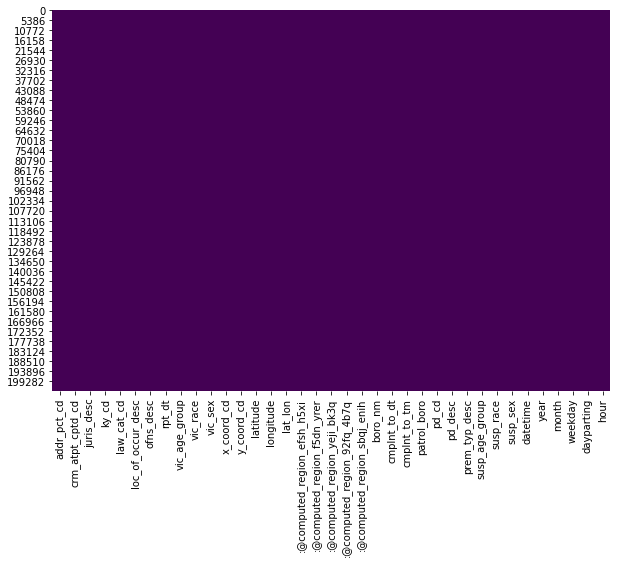

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')

In [7]:
pd.value_counts(data['prem_typ_desc'])[:10]

STREET                        56735
RESIDENCE - APT. HOUSE        51148
RESIDENCE-HOUSE               22108
RESIDENCE - PUBLIC HOUSING    15826
CHAIN STORE                    8661
COMMERCIAL BUILDING            4683
DEPARTMENT STORE               4570
OTHER                          4314
DRUG STORE                     4220
TRANSIT - NYC SUBWAY           4003
Name: prem_typ_desc, dtype: int64

In [8]:
pd.value_counts(data['ofns_desc'])[:10]


PETIT LARCENY                     38552
HARRASSMENT 2                     34303
CRIMINAL MISCHIEF & RELATED OF    21882
ASSAULT 3 & RELATED OFFENSES      21758
GRAND LARCENY                     16152
FELONY ASSAULT                    10264
OFF. AGNST PUB ORD SENSBLTY &      8366
MISCELLANEOUS PENAL LAW            6815
ROBBERY                            5798
BURGLARY                           5574
Name: ofns_desc, dtype: int64

<AxesSubplot:xlabel='count', ylabel='prem_typ_desc'>

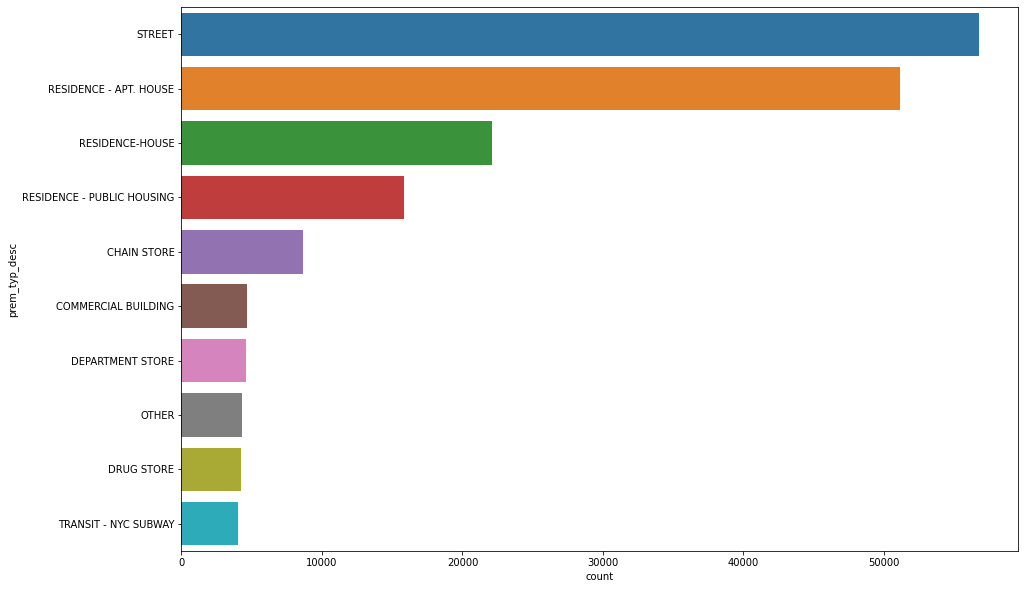

In [10]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'prem_typ_desc', data = data, order = data['prem_typ_desc'].value_counts().iloc[:10].index)

In [11]:
newyork_map = folium.Map(location=[40.668583957,-73.9269799319999],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [14]:
locations = data.groupby('addr_pct_cd').first()

In [16]:
new_locations = locations.loc[:, ['latitude','longitude', 'prem_typ_desc', 'law_cat_cd']]

In [17]:
new_locations.head()


,latitude,longitude,prem_typ_desc,law_cat_cd
addr_pct_cd,,,,
1,40.715507,-74.005200,CHAIN STORE,MISDEMEANOR
5,40.716196,-73.997491,OTHER,FELONY
6,40.733897,-74.005396,RESIDENCE - APT. HOUSE,MISDEMEANOR
7,40.716508,-73.983920,RESIDENCE - PUBLIC HOUSING,MISDEMEANOR
9,40.726554,-73.987828,RESIDENCE - APT. HOUSE,FELONY


In [18]:
popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

In [19]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(newyork_map)

In [20]:
newyork_map

In [22]:
unique_locations = data['lat_lon'].value_counts()

In [23]:
unique_locations.index


Index(['{'latitude': '40.75043076800005', 'longitude': '-73.98928217599996'}',
       '{'latitude': '40.65170090400005', 'longitude': '-73.86844675099996'}',
       '{'latitude': '40.80837413600005', 'longitude': '-73.94688582299993'}',
       '{'latitude': '40.714617135000026', 'longitude': '-74.01144362299993'}',
       '{'latitude': '40.73392684100002', 'longitude': '-73.87158239799999'}',
       '{'latitude': '40.67998073800004', 'longitude': '-73.77623390699993'}',
       '{'latitude': '40.77021126900007', 'longitude': '-73.98224260599994'}',
       '{'latitude': '40.77368684900005', 'longitude': '-73.95480591899997'}',
       '{'latitude': '40.83778161800007', 'longitude': '-73.91945797099999'}',
       '{'latitude': '40.691011529000036', 'longitude': '-73.98345727099996'}',
       ...
       '{'latitude': '40.69156445900006', 'longitude': '-73.837136522'}',
       '{'latitude': '40.75357979600005', 'longitude': '-73.75375659099996'}',
       '{'latitude': '40.682887522000044', '

In [44]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"{'latitude': '40.75043076800005', 'longitude':...",611
1,"{'latitude': '40.65170090400005', 'longitude':...",351
2,"{'latitude': '40.80837413600005', 'longitude':...",288
3,"{'latitude': '40.714617135000026', 'longitude'...",287
4,"{'latitude': '40.73392684100002', 'longitude':...",286


In [38]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  preProcess[0][13:-1]
    long = preProcess[1][15:-1]
    return (lat, long)
# Location_extractor('{"latitude": "40.75043076800005", "longitude": "-73.98928217599996"}')

In [46]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [47]:
# CR_index

In [48]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)


In [49]:
%%time

newyork_map_crime = folium.Map(location=[40.668583957,-73.9269799319999],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 200:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(newyork_map_crime)

Wall time: 78 ms


In [50]:
newyork_map_crime